In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import pandas as pd

In [2]:
raw = imageio.imread('./raw_z0.tiff')
label = imageio.imread('./label_z0.tiff')

# raw = np.array(raw, dtype=np.uint64)
label = np.array(label, dtype=np.uint64)

/tmp/ipykernel_3754412/737477256.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  raw = imageio.imread('./raw_z0.tiff')


/tmp/ipykernel_3754412/737477256.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  label = imageio.imread('./label_z0.tiff')


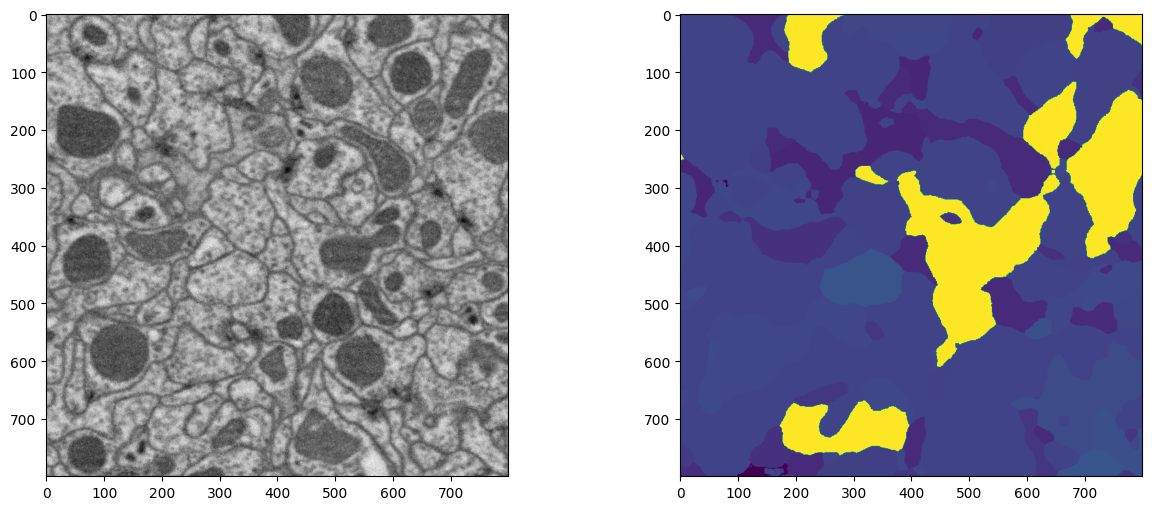

In [3]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(121)
ax.imshow(raw, cmap='gray')

ax = fig.add_subplot(122)
ax.imshow(label)

In [4]:
seg1 = imageio.imread('./MedSAM(failed).tif')
seg2 = imageio.imread('./microsam.tiff')
seg3 = imageio.imread('./napari-sam(h).tiff')
seg4 = imageio.imread('./UniSPAC(one-by-one).tiff')
seg5 = imageio.imread('./UniSPAC(automatic+proofread).tiff')
method_names = ['MedSAM','micro-sam', 'napari-SAM', 'UniSPAC(one-by-one)','UniSPAC(automatic+proofread)']

/tmp/ipykernel_3754412/892738775.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  seg1 = imageio.imread('./MedSAM(failed).tif')
/tmp/ipykernel_3754412/892738775.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  seg2 = imageio.imread('./microsam.tiff')
/tmp/ipykernel_3754412/892738775.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  seg3 = imageio.imread('./napari-sam(h).tiff

In [5]:
from funlib.evaluate import rand_voi

In [6]:
for seg, method in zip([seg1, seg2, seg3, seg4, seg5],method_names):
    seg = np.array(seg, dtype=np.uint64)
    rand_voi_report = rand_voi(
                    np.array(label),
                    np.array(seg),
                    return_cluster_scores=False)

    metrics = rand_voi_report.copy()
    print("{}: voi = {:.4f}, voi split = {:.4f}, voi merge = {:.4f}".format(
        method,
        metrics['voi_split'] + metrics['voi_merge'],
        metrics['voi_split'],
        metrics['voi_merge']))

MedSAM: voi = 5.3911, voi split = 0.6021, voi merge = 4.7890
micro-sam: voi = 2.4022, voi split = 1.1692, voi merge = 1.2330
napari-SAM: voi = 2.7207, voi split = 1.1186, voi merge = 1.6022
UniSPAC(one-by-one): voi = 2.0554, voi split = 1.0706, voi merge = 0.9848
UniSPAC(automatic+proofread): voi = 1.7817, voi split = 1.0969, voi merge = 0.6847


## 标注准确度VOI的对比

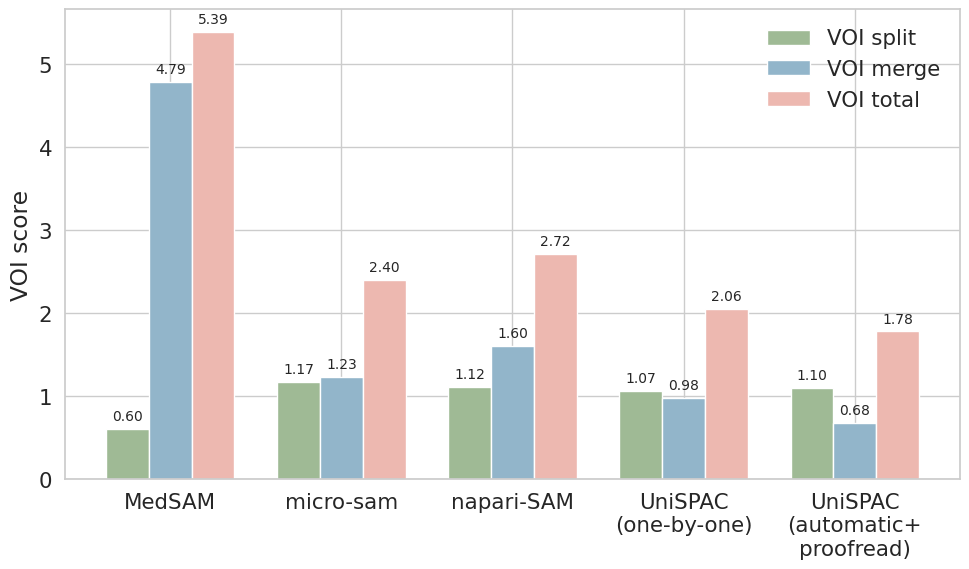

In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import seaborn as sns
import numpy as np

# 设置风格
sns.set_context("notebook", font_scale=1.4)
sns.set_style("whitegrid")

# 方法及 VOI 分数
methods = [
    "MedSAM",
    "micro-sam",
    "napari-SAM",
    "UniSPAC\n(one-by-one)",
    "UniSPAC\n(automatic+\nproofread)"
]

voi_split = [0.6021, 1.1692, 1.1186, 1.0706, 1.0969]
voi_merge = [4.7890, 1.2330, 1.6022, 0.9848, 0.6847]
voi_total = [5.3911, 2.4022, 2.7207, 2.0554, 1.7817]

# 设置柱状图参数
x = np.arange(len(methods))
width = 0.25

# 颜色选择
# colors = sns.color_palette("Set2", 3)
colors = ['#9FBA95', '#92B5CA', '#EDB8B0']

# 创建图形
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, voi_split, width, label='VOI split', color=colors[0])
rects2 = ax.bar(x, voi_merge, width, label='VOI merge', color=colors[1])
rects3 = ax.bar(x + width, voi_total, width, label='VOI total', color=colors[2])

# 坐标轴和标题设置
ax.set_ylabel('VOI score')
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=0)
ax.legend(frameon=False)



# 添加数值标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  # 偏移值
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
# plt.show()

plt.savefig('./figure2c.pdf', dpi=300) 

## 标注Prompts的对比

In [1]:
import imageio
import numpy as np

##看看UniSPAC(automatic+proofread)有多少神经元
seg5 = imageio.imread('./UniSPAC(automatic+proofread).tiff')
id_list = np.unique(seg5)
print(len(id_list))

185


/tmp/ipykernel_1388563/249493564.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  seg5 = imageio.imread('./UniSPAC(automatic+proofread).tiff')


In [2]:
import pandas as pd

prompts_microsam = list()
for n_file in range(1, 87):
    file_name = 'point_prompts copy [{}].csv'.format(n_file)
    data = pd.read_csv('./microsam(points)/{}'.format(file_name)).values.tolist()
    n_prompts = len(data)
    
    prompts_microsam.append(n_prompts)
print(prompts_microsam)

[1, 1, 4, 1, 1, 12, 4, 1, 5, 11, 2, 3, 1, 3, 3, 2, 1, 5, 3, 1, 10, 3, 5, 1, 6, 3, 13, 12, 1, 2, 2, 18, 13, 1, 1, 4, 7, 1, 1, 3, 1, 3, 2, 3, 5, 1, 1, 7, 1, 1, 1, 1, 1, 3, 1, 8, 2, 1, 2, 1, 2, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1]


/tmp/ipykernel_1388563/3528354383.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, y="Method", x="Prompts", palette=palette, inner="box", linewidth=1.2, cut=0)


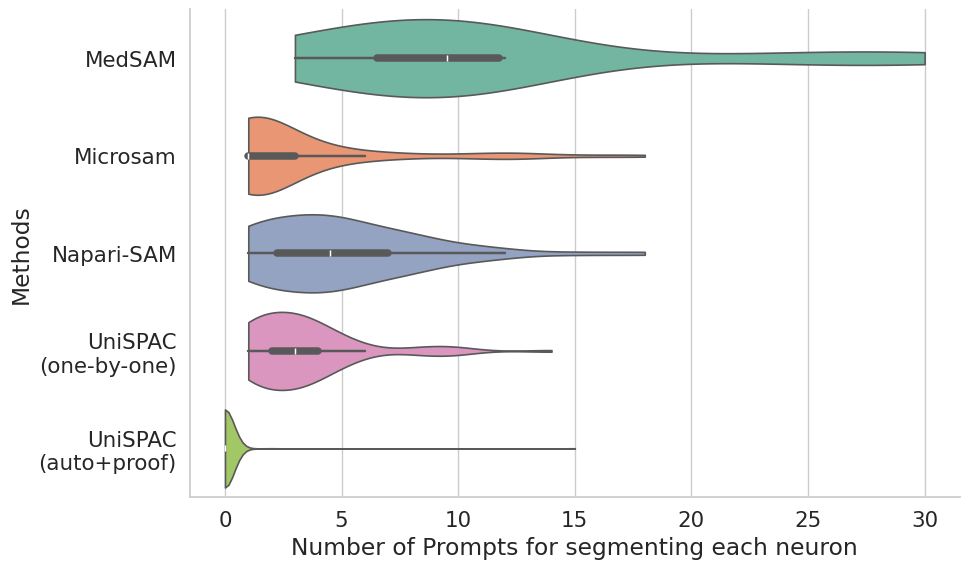

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置风格
sns.set(style="whitegrid", context="notebook", font_scale=1.4)

# 每个方法的 prompts 数量
data = {
    "MedSAM": [6, 3, 9, 5, 12, 5, 10, 10, 8, 9, 11, 12, 30, 25],
    "Microsam": prompts_microsam,  
    "Napari-SAM": [
        1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 8, 5, 4, 4, 7, 2, 5, 7, 9, 11, 5, 3, 4,
        5, 5, 3, 18, 4, 1, 4, 5, 5, 11, 4, 2, 3, 2, 3, 11, 5, 9, 3, 5, 8, 12,
        6, 3, 2, 1, 8, 2, 9, 3, 2, 8, 15, 6, 7, 9, 5, 5, 1, 4, 3, 6, 7, 7, 7, 7, 4
    ],
    "UniSPAC\n(one-by-one)": [
        2, 6, 4, 8, 2, 3, 3, 2, 3, 2, 4, 4, 2, 3, 3, 3, 2, 2, 1, 3, 3, 6,
        5, 1, 10, 5, 1, 1, 4, 9, 4, 3, 2, 2, 2, 2, 4, 3, 2, 3, 4, 9, 4, 10,
        4, 5, 4, 3, 1, 1, 1, 1, 5, 2, 4, 1, 3, 4, 1, 1, 1, 1, 3, 3, 3, 2,
        2, 3, 2, 2, 5, 1, 5, 14, 6, 1, 3, 3, 1, 3, 1, 5, 8, 1, 1, 4, 2,
        2, 4, 3, 4, 1, 5, 10, 3, 2, 1, 4, 9
    ],
    "UniSPAC\n(auto+proof)": [15, 2] + list(np.zeros(185-2))
}

# 整理成适合 seaborn 的 dataframe
rows = []
for method, prompts in data.items():
    for value in prompts:
        rows.append({"Method": method, "Prompts": value})

df = pd.DataFrame(rows)

# 小提琴图
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2", len(data))
sns.violinplot(data=df, y="Method", x="Prompts", palette=palette, inner="box", linewidth=1.2, cut=0)

# 标题与样式
plt.xlabel("Number of Prompts for segmenting each neuron")
plt.ylabel("Methods")
sns.despine()
plt.tight_layout()
# plt.show()

plt.savefig('./figure2d.pdf', dpi=300) 

In [4]:
import numpy as np

for method, prompts in data.items():
    ave_num_prompts = np.mean(prompts)    #均值
    mid_num_prompts = np.median(prompts)  #中位数
    
    print("{}:ave={},mid={}".format(method,ave_num_prompts, mid_num_prompts))

MedSAM:ave=11.071428571428571,mid=9.5
Microsam:ave=3.058139534883721,mid=1.0
Napari-SAM:ave=5.0285714285714285,mid=4.5
UniSPAC
(one-by-one):ave=3.393939393939394,mid=3.0
UniSPAC
(auto+proof):ave=0.0918918918918919,mid=0.0


## 对比鼠标点击次数

In [5]:
import pandas as pd

num_click_microsam = list()
for n_file in range(1, 87):
    file_name = 'point_prompts copy [{}].csv'.format(n_file)
    data = pd.read_csv('./microsam(points)/{}'.format(file_name)).values.tolist()
    n_click = 0
    last_prompt = 'positive'
    for item in data:
        current_prompt = item[-1]
        if current_prompt == last_prompt:
            n_click = n_click + 2 #如果是同一类prompt,只需要2次点击(一次添加、一次分割)
        else:
            n_click = n_click + 4 #如果不是同一类prompt,只需要4次点击(一次添加、2次换prompts类型、一次分割)
        last_prompt = current_prompt
        
    n_click = n_click + 1 ##最后一次commit的点击
    num_click_microsam.append(n_click)
print(num_click_microsam)

ave_num_clicks = np.mean(num_click_microsam)    #均值
mid_num_clicks = np.median(num_click_microsam)  #中位数
print("{}:ave={},mid={}".format(method,ave_num_clicks, mid_num_clicks))

[3, 3, 9, 3, 3, 31, 9, 3, 13, 29, 5, 7, 3, 9, 7, 5, 3, 13, 7, 3, 23, 7, 13, 3, 15, 7, 31, 27, 3, 5, 5, 39, 29, 3, 3, 11, 17, 3, 3, 7, 3, 9, 7, 7, 13, 3, 3, 17, 3, 3, 3, 3, 3, 7, 3, 19, 5, 3, 5, 3, 5, 35, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 5, 7, 3, 3, 3]
UniSPAC
(auto+proof):ave=7.72093023255814,mid=3.0


/tmp/ipykernel_1388563/38858337.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, y="Method", x="Clicks", palette=palette, inner="box", linewidth=1.2, cut=0)


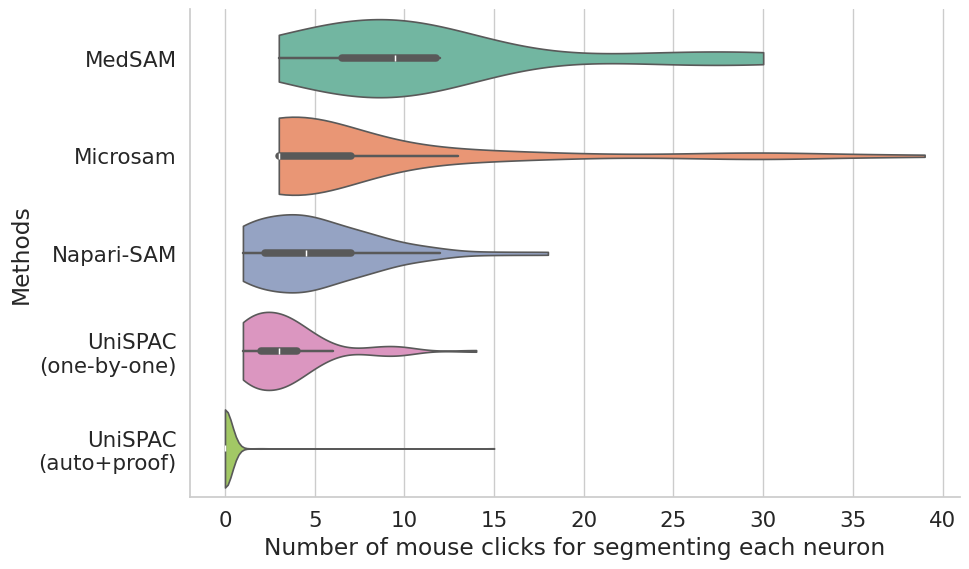

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置风格
sns.set(style="whitegrid", context="notebook", font_scale=1.4)

# 每个方法的 prompts 数量
data = {
    "MedSAM": [6, 3, 9, 5, 12, 5, 10, 10, 8, 9, 11, 12, 30, 25],
    "Microsam": num_click_microsam,  
    "Napari-SAM": [
        1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 8, 5, 4, 4, 7, 2, 5, 7, 9, 11, 5, 3, 4,
        5, 5, 3, 18, 4, 1, 4, 5, 5, 11, 4, 2, 3, 2, 3, 11, 5, 9, 3, 5, 8, 12,
        6, 3, 2, 1, 8, 2, 9, 3, 2, 8, 15, 6, 7, 9, 5, 5, 1, 4, 3, 6, 7, 7, 7, 7, 4
    ],
    "UniSPAC\n(one-by-one)": [
        2, 6, 4, 8, 2, 3, 3, 2, 3, 2, 4, 4, 2, 3, 3, 3, 2, 2, 1, 3, 3, 6,
        5, 1, 10, 5, 1, 1, 4, 9, 4, 3, 2, 2, 2, 2, 4, 3, 2, 3, 4, 9, 4, 10,
        4, 5, 4, 3, 1, 1, 1, 1, 5, 2, 4, 1, 3, 4, 1, 1, 1, 1, 3, 3, 3, 2,
        2, 3, 2, 2, 5, 1, 5, 14, 6, 1, 3, 3, 1, 3, 1, 5, 8, 1, 1, 4, 2,
        2, 4, 3, 4, 1, 5, 10, 3, 2, 1, 4, 9
    ],
    "UniSPAC\n(auto+proof)": [15, 2] + list(np.zeros(185-2))
}

# 整理成适合 seaborn 的 dataframe
rows = []
for method, prompts in data.items():
    for value in prompts:
        rows.append({"Method": method, "Clicks": value})

df = pd.DataFrame(rows)

# 小提琴图
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2", len(data))
sns.violinplot(data=df, y="Method", x="Clicks", palette=palette, inner="box", linewidth=1.2, cut=0)

# 标题与样式
plt.xlabel("Number of mouse clicks for segmenting each neuron")
plt.ylabel("Methods")
sns.despine()
plt.tight_layout()
# plt.show()

plt.savefig('./extend_fig1.pdf', dpi=300) 

## 标注时间的对比

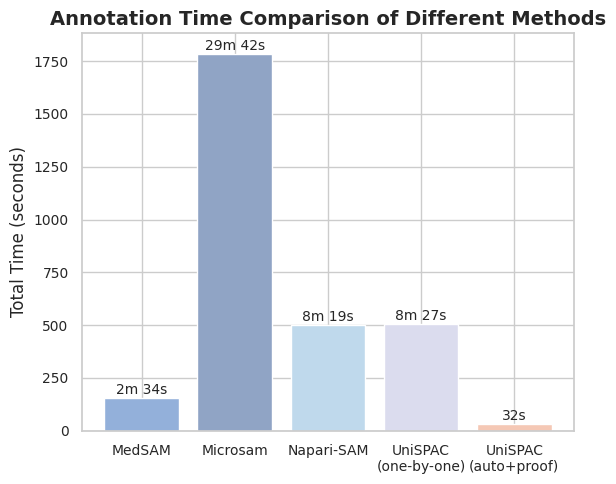

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 方法名
methods = [
    "MedSAM",
    "Microsam",
    "Napari-SAM",
    "UniSPAC\n(one-by-one)",
    "UniSPAC\n(auto+proof)"
]
# 开始与结束时间（单位：秒）
start_times = [26, 34, 33, 33, 21]
end_times = [3*60, 30*60 + 16, 8*60 + 52, 9*60, 53]
durations = [end - start for start, end in zip(start_times, end_times)]

# 转换为分钟 + 秒格式的字符串
duration_labels = [f"{d//60}m {d%60}s" if d >= 60 else f"{d}s" for d in durations]

# 设置风格和颜色
sns.set_theme(style="whitegrid")
# palette = sns.color_palette("muted")
palette = ["#93b0da", '#90a4c5',  '#bfd9ec', '#dbdcee', '#f5c8b5']

# 绘图
plt.figure(figsize=(6, 5))
bars = plt.bar(methods, durations, color=palette)

# 添加文本标签（分钟+秒格式）
for bar, label in zip(bars, duration_labels):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, label, 
             ha='center', va='bottom', fontsize=10)

# 图表美化
plt.ylabel("Total Time (seconds)", fontsize=12)
plt.title("Annotation Time Comparison of Different Methods", fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, max(durations) + 100)

plt.tight_layout()
# plt.show()

plt.savefig('./figure2e.pdf', dpi=300) 

## Figure3中patch size大小对VOI的影响

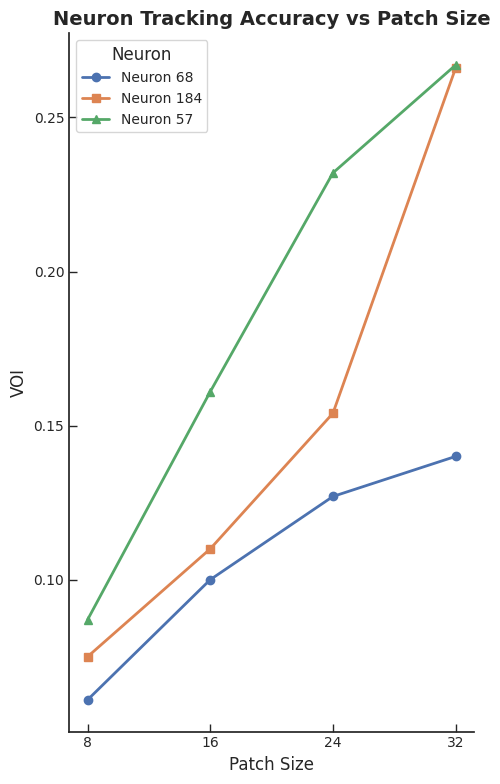

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import seaborn as sns

# 数据
patch_size = [8, 16, 24, 32]
VOI_neuron_68 = [0.061, 0.100, 0.127, 0.140]
VOI_neuron_184 = [0.075, 0.110, 0.154, 0.266]
VOI_neuron_57 = [0.087, 0.161, 0.232, 0.267]

# 设置风格
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(5, 8))

# 画线（注意：x是VOI，y是patch size）
ax.plot(patch_size, VOI_neuron_68, marker='o', label="Neuron 68", linewidth=2)
ax.plot(patch_size, VOI_neuron_184, marker='s', label="Neuron 184", linewidth=2)
ax.plot(patch_size, VOI_neuron_57, marker='^', label="Neuron 57", linewidth=2)

# 设置坐标轴和标题
ax.set_xlabel("Patch Size", fontsize=12)
ax.set_ylabel("VOI", fontsize=12)
ax.set_title("Neuron Tracking Accuracy vs Patch Size", fontsize=14, weight='bold')
ax.legend(title="Neuron", fontsize=10)

# 设置刻度和刻度线
ax.set_xticks(patch_size)
ax.tick_params(axis='x', labelsize=10, direction='in', length=6, width=1, top=False, right=False, bottom=True)
ax.tick_params(axis='y', labelsize=10, direction='in', length=6, width=1, left=True, right=False)

# 只显示左边和下边的线段坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
# plt.show()
plt.savefig('./figure3d.pdf', dpi=300) 
